In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Churn_Modelling.csv")  # Change filename based on actual dataset
print(df.shape)
df.head()


(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Drop irrelevant columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Label encode categorical columns
categorical_cols = ['Geography', 'Gender']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Set features and target
X = df.drop('Exited', axis=1)
y = df['Exited']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("🔎 Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("\n🌟 Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

print("\n🌲 Random Forest:")
print(classification_report(y_test, y_pred_rf))


🔎 Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000


🌟 Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.48      0.59       407

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.85      2000


🌲 Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted av

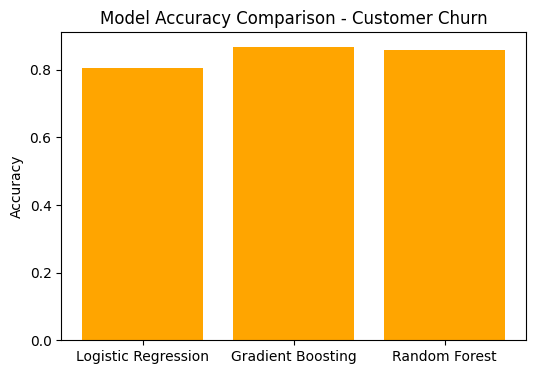

In [ ]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Gradient Boosting', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_gb),
    accuracy_score(y_test, y_pred_rf)
]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color='orange')
plt.title("Model Accuracy Comparison - Customer Churn")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
import joblib

joblib.dump(gb, "churn_gradient_boost_model.joblib")
joblib.dump(scaler, "churn_scaler.joblib")
joblib.dump(label_encoders, "churn_label_encoders.joblib")


['churn_label_encoders.joblib']